#### Problem Summary
We aim to determine the maximum value of $n$ for which the ratio $\frac{\omega_d(n)}{n} = \frac{1}{2}$ holds true for each digit $d$ (ranging from 1 to 9). Here, $\omega_d(n)$ represents the count of natural numbers up to $n$ that contain the digit $d$ in their decimal representation.

#### Algorithm Overview
The solution is structured into three primary steps:

1. **Compute Cumulative Counts $\omega_d(n)$:**
    - For each $n$ up to a specified maximum value $\text{max}_n$, we calculate and maintain cumulative counts of numbers containing each digit $d$. These counts are stored in arrays indexed by $n$.

2. **Find Intersection Points:**
    - For each $n$, we compute the ratio $\frac{\omega_d(n)}{n}$ and identify where this ratio equals $\frac{1}{2}$. This step involves checking divisibility conditions to manage floating-point precision effectively.
    
    Specifically, we solve for $n$ in:
    $$
    \frac{\omega_d(n)}{n} = \frac{1}{2}
    $$
    This equation implies:
    $$
    \omega_d(n) = \frac{n}{2}
    $$
    
    Since $\omega_d(n)$ and $n$ are integers, $n$ must be even for the equation to hold.

3. **Visualization:**
    - We plot the ratios $\frac{\omega_d(n)}{n}$ against $n$ to visually confirm the behavior, including horizontal lines at $\frac{1}{2}$ and $\frac{3}{4}$ for reference.


Starting computation of cumulative counts up to n = 100000000...
Processed up to n = 10000000 in 120.74 seconds.
Processed up to n = 20000000 in 251.16 seconds.
Processed up to n = 30000000 in 378.78 seconds.
Processed up to n = 40000000 in 508.70 seconds.
Processed up to n = 50000000 in 635.92 seconds.
Processed up to n = 60000000 in 763.22 seconds.
Processed up to n = 70000000 in 892.52 seconds.
Processed up to n = 80000000 in 1030.73 seconds.
Processed up to n = 90000000 in 1159.19 seconds.
Processed up to n = 100000000 in 1286.36 seconds.
Completed computation in 1286.36 seconds.

Starting intersection detection...
Digit 1: Found 16 n values where ω_1(n)/n = 0.5.
Digit 1: Found 5 n values where ω_1(n)/n = 0.75.
Digit 2: Found 24 n values where ω_2(n)/n = 0.5.
Digit 2: Found 0 n values where ω_2(n)/n = 0.75.
Digit 3: Found 12 n values where ω_3(n)/n = 0.5.
Digit 3: Found 0 n values where ω_3(n)/n = 0.75.
Digit 4: Found 6 n values where ω_4(n)/n = 0.5.
Digit 4: Found 0 n values where

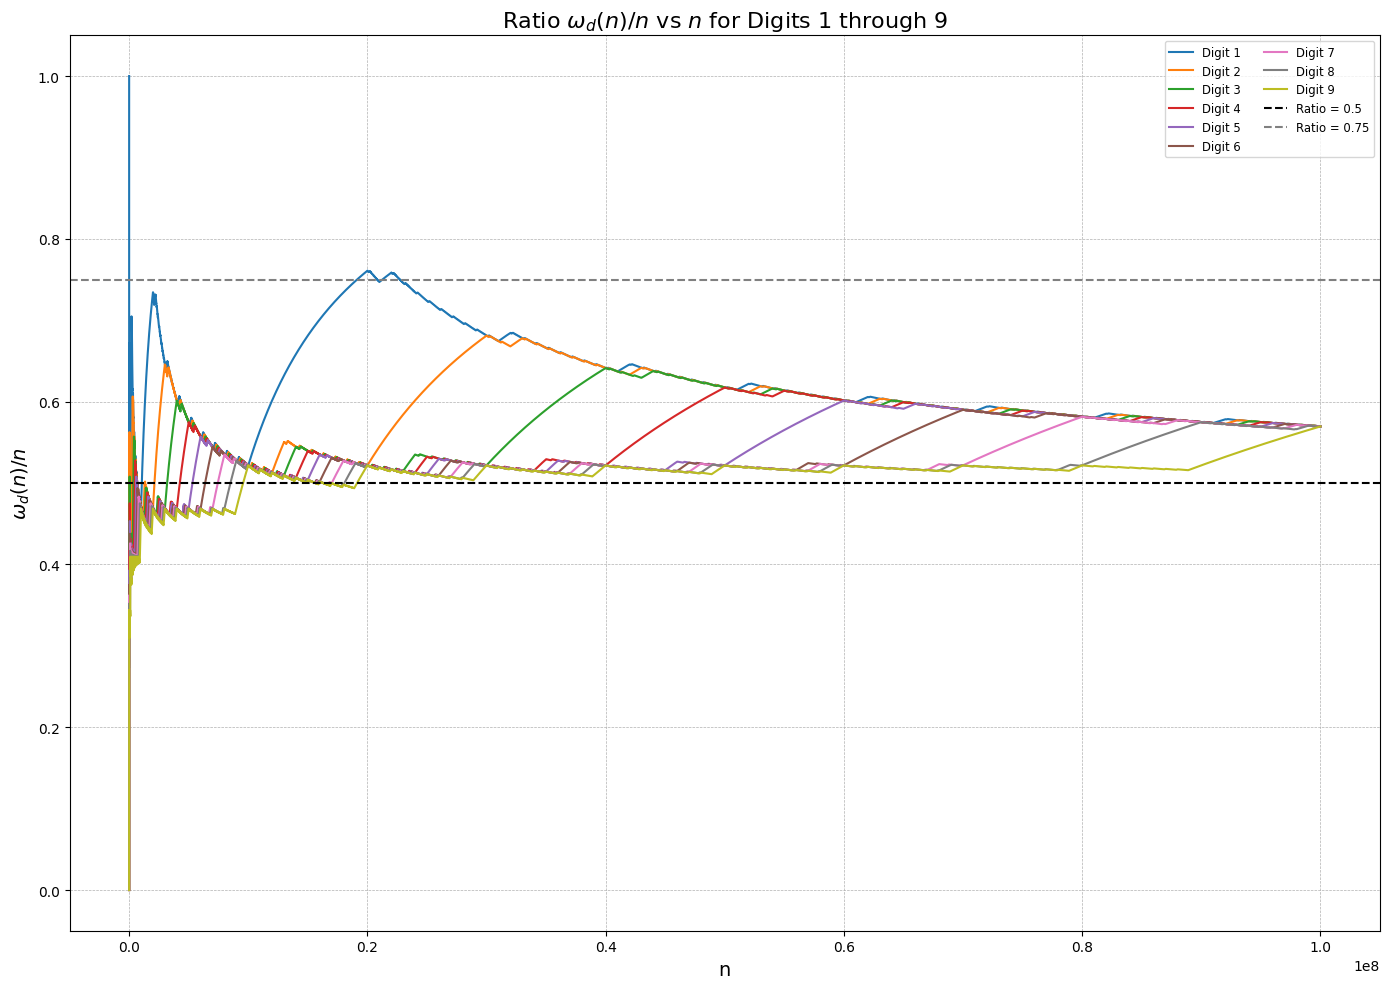

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def compute_cumulative_counts(max_n=10_000_000):
    """
    Computes the cumulative counts ω_d(n) for each digit d from 1 to 9 up to max_n.

    Parameters:
    - max_n: int
        The maximum value of n to compute.

    Returns:
    - cumulative_counts: dict
        A dictionary with digits as keys ('1' to '9') and NumPy arrays containing
        ω_d(n) for each n as values.
    """
    # Initialize arrays for digits 1 through 9 with zeros
    # Using uint32 to prevent overflow for large counts
    cumulative_counts = {str(d): np.zeros(max_n + 1, dtype=np.uint32) for d in range(1, 10)}

    print(f"Starting computation of cumulative counts up to n = {max_n}...")
    start_time = time.time()

    for n in range(1, max_n + 1):
        str_n = str(n)
        for d in cumulative_counts.keys():
            if d in str_n:
                cumulative_counts[d][n] = cumulative_counts[d][n - 1] + 1
            else:
                cumulative_counts[d][n] = cumulative_counts[d][n - 1]
        
        # Progress update every 10,000,000 numbers
        if n % 10_000_000 == 0:
            elapsed = time.time() - start_time
            print(f"Processed up to n = {n} in {elapsed:.2f} seconds.")

    total_time = time.time() - start_time
    print(f"Completed computation in {total_time:.2f} seconds.\n")
    
    return cumulative_counts

def find_intersections(cumulative_counts, max_n=10_000_000, targets=(0.5, 0.75)):
    """
    Finds all n where ω_d(n)/n equals the target ratios for each digit.

    Parameters:
    - cumulative_counts: dict
        Dictionary with digits as keys ('1' to '9') and NumPy arrays containing
        ω_d(n) for each n as values.
    - max_n: int
        The maximum value of n.
    - targets: tuple of floats
        The target ratios to find intersections for.

    Returns:
    - intersections: dict
        A nested dictionary where the first key is the digit, the second key is the target ratio,
        and the value is a list of n that satisfy ω_d(n)/n == target.
    """
    intersections = {d: {target: [] for target in targets} for d in cumulative_counts.keys()}
    n_values = np.arange(1, max_n + 1)

    print("Starting intersection detection...")
    start_time = time.time()

    for d in cumulative_counts.keys():
        omega_d = cumulative_counts[d][1:max_n + 1]  # Exclude index 0 to match n=1..max_n
        ratios = omega_d / n_values

        for target in targets:
            # Find all n where ratio == target
            # Due to floating point precision, check integer equality
            # i.e., ω_d(n) * denominator == n * numerator
            numerator = int(target * 100)
            denominator = 100
            # To handle floating point precision, consider exact integer equality
            # ω_d(n) / n == target  => ω_d(n) == target * n
            # Since ω_d(n) and n are integers, target * n must also be integer
            # Hence, n must be divisible by denominator/gcd(numerator, denominator)
            # For 0.5, numerator=50, denominator=100, gcd=50, so n must be divisible by 2
            # For 0.75, numerator=75, denominator=100, gcd=25, so n must be divisible by 4

            if target == 0.5:
                required_divisor = 2
                required_count = lambda x: x == x // 2 * 2
            elif target == 0.75:
                required_divisor = 4
                required_count = lambda x: x == (3 * x) // 4 * (4 // 3)  # Ensures x = 3n/4
            else:
                required_divisor = 1  # Default case
                required_count = lambda x: False  # No condition

            # To ensure ω_d(n) = target * n, target * n must be integer
            # Thus, n must be divisible appropriately
            if target == 0.5:
                # ω_d(n) = n / 2
                # So n must be even and ω_d(n) = n // 2
                valid_ns = np.where( (n_values % 2 == 0) & (omega_d == (n_values // 2)) )[0] + 1
            elif target == 0.75:
                # ω_d(n) = 3n / 4
                # So n must be divisible by 4
                # and ω_d(n) = 3n // 4
                valid_ns = np.where( (n_values % 4 == 0) & (omega_d == (3 * n_values) // 4) )[0] + 1
            else:
                valid_ns = np.array([], dtype=int)

            intersections[d][target] = valid_ns.tolist()

            print(f"Digit {d}: Found {len(intersections[d][target])} n values where ω_{d}(n)/n = {target}.")

    total_time = time.time() - start_time
    print(f"Completed intersection detection in {total_time:.2f} seconds.\n")

    return intersections

def plot_ratios(cumulative_counts, max_n=100_000_000, step=1000):
    """
    Plots the ratio ω_d(n)/n for digits 1 through 9 up to max_n,
    including horizontal lines at 0.5 and 0.75.

    Parameters:
    - cumulative_counts: dict
        Dictionary with digits as keys ('1' to '9') and NumPy arrays containing
        ω_d(n) for each n as values.
    - max_n: int
        The maximum value of n to plot.
    - step: int
        The step size for plotting to reduce the number of points.
        Plot every 'step' points. Default is 1000.
    """
    digits = sorted(cumulative_counts.keys())
    n_values = np.arange(1, max_n + 1)

    # Sample n_values and corresponding counts to reduce plotting data
    sampled_indices = np.arange(1, max_n + 1, step)
    sampled_n = sampled_indices
    plt.figure(figsize=(14, 10))

    for d in digits:
        omega_d = cumulative_counts[d][sampled_indices]
        ratio = omega_d / sampled_n
        plt.plot(sampled_n, ratio, label=f"Digit {d}")

    # Plot horizontal lines for target ratios
    plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1.5, label="Ratio = 0.5")
    plt.axhline(y=0.75, color='grey', linestyle='--', linewidth=1.5, label="Ratio = 0.75")

    plt.xlabel("n", fontsize=14)
    plt.ylabel(r"$\omega_d(n) / n$", fontsize=14)
    plt.title(r"Ratio $\omega_d(n) / n$ vs $n$ for Digits 1 through 9", fontsize=16)
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def main():
    # Set the maximum n value
    max_n = 100_000_000  

    # Step 1: Compute cumulative counts
    cumulative_counts = compute_cumulative_counts(max_n=max_n)

    # Step 2: Find intersection points where ω_d(n)/n == 0.5 and 0.75
    targets = (0.5, 0.75)
    intersections = find_intersections(cumulative_counts, max_n=max_n, targets=targets)

    # Step 3: Print the intersection points
    print("Intersection Points:")
    for d in sorted(intersections.keys(), key=lambda x: int(x)):
        for target in targets:
            n_list = intersections[d][target]
            if n_list:
                print(f"\nDigit {d} - ω_{d}(n)/n = {target}:")
                print(", ".join(map(str, n_list)))
            else:
                print(f"\nDigit {d} - ω_{d}(n)/n = {target}: No such n found up to {max_n}")

    # Step 4: Plot the ratios
    plot_ratios(cumulative_counts, max_n=max_n, step=1000)

if __name__ == "__main__":
    main()


### Piecewise Linear Fit to Maximum $n$ Values

The following Python code defines a piecewise linear function to model the maximum $n$ values where $\frac{\omega_d(n)}{n} = \frac{1}{2}$ for each digit $d$. By fitting this function to the data points, we aim to identify a simple formula $f(d)$ that predicts these maximum values for as many digits $d$ as possible.


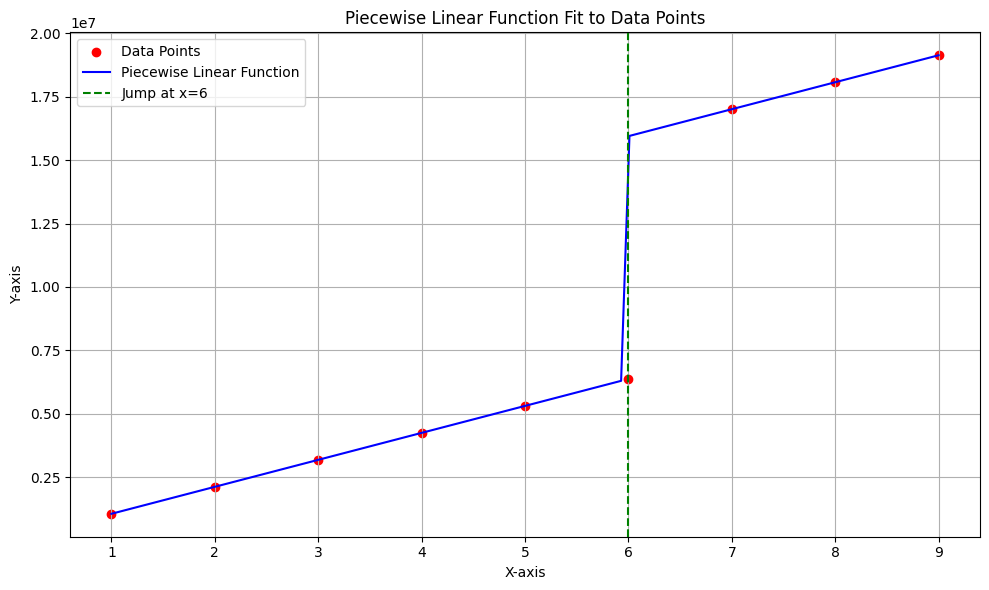

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise linear function
def piecewise_linear(x):
    if x <= 6:
        return 1062880 + 1062882 * (x - 1)
    else:
        return 1062880 + 1062882 * (x + 8)

# Vectorize the function to handle numpy arrays
piecewise_linear_vectorized = np.vectorize(piecewise_linear)

# Provided data points
data_points = [
    (1, 1062880),
    (2, 2125762),
    (3, 3188644),
    (4, 4251526),
    (5, 5314408),
    (6, 6377290),
    (7, 17006110),
    (8, 18068992),
    (9, 19131874)
]

# Separate the x and y coordinates
x_data = np.array([point[0] for point in data_points])
y_data = np.array([point[1] for point in data_points])

# Generate x values for plotting the piecewise function
x_fit = np.linspace(1, 9, 100)
y_fit = piecewise_linear_vectorized(x_fit)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Data Points')

# Plot the piecewise linear function
plt.plot(x_fit, y_fit, color='blue', label='Piecewise Linear Function')

# Highlight the jump at x=6
plt.axvline(x=6, color='green', linestyle='--', label='Jump at x=6')

# Add titles and labels
plt.title('Piecewise Linear Function Fit to Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Fitting a 4th-Degree Polynomial to Predict Maximum $n$ for $d=1$ at $\frac{\omega_1(n)}{n} = \frac{3}{4}$

In this cell, we address the bonus problem of finding the maximum value of $n$ for which $\frac{\omega_1(n)}{n} = \frac{3}{4}$. To achieve this, we perform the following steps:

1. **Data Preparation:**
   - **Given Data Points:** We use previously identified maximum $n$ values corresponding to the ratio $\frac{3}{4}$.
   - **Polynomial Fitting:** A 4th-degree polynomial is fitted to these data points to model the relationship between the index and the maximum $n$.

2. **Polynomial Evaluation:**
   - **Coefficient Extraction:** The coefficients of the fitted polynomial are printed to understand the underlying pattern.
   - **Visualization:** We plot the original data points alongside the fitted polynomial curve to visualize the accuracy of the fit.

This approach helps in identifying a potential formula $f(d)$ that predicts the maximum $n$ for $d=1$ at the specified ratio, leveraging the trend captured by the polynomial model.

Fitted 4th-Degree Polynomial Coefficients:
a0 = 12125568.0000
a1 = 11272097.6667
a2 = -5194330.1667
a3 = 992460.3333
a4 = -63923.8333

Polynomial Equation:
            4             3             2
-6.392e+04 x + 9.925e+05 x - 5.194e+06 x + 1.127e+07 x + 1.213e+07


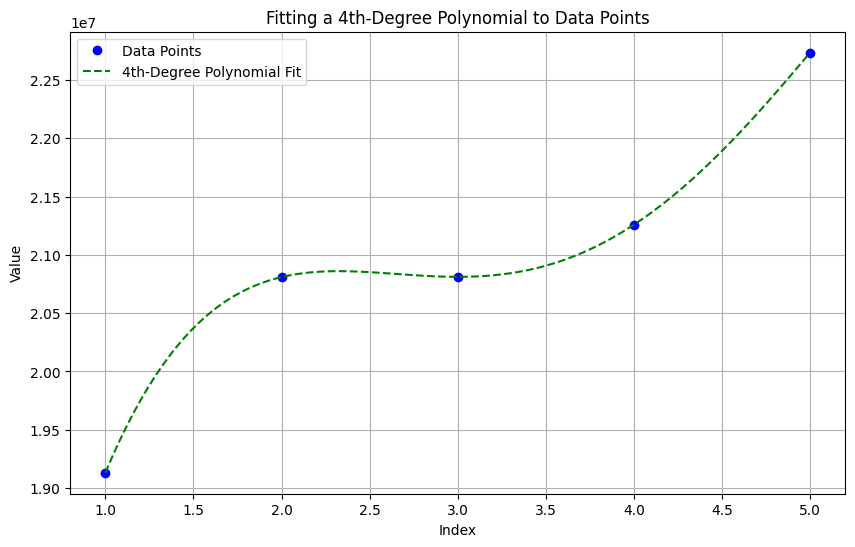

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
y_values = [19131872, 20809344, 20811488, 21257636, 22732948]
x_values = np.array([1, 2, 3, 4, 5])  # Indices as x-values

# Fit a 4th-degree polynomial
degree = 4
coefficients = np.polyfit(x_values, y_values, deg=degree)
polynomial = np.poly1d(coefficients)

# Display the polynomial equation
print("Fitted 4th-Degree Polynomial Coefficients:")
for power, coeff in enumerate(coefficients[::-1]):
    print(f"a{power} = {coeff:.4f}")
print("\nPolynomial Equation:")
print(polynomial)

# Generate x-values for plotting the polynomial curve
x_fit = np.linspace(min(x_values), max(x_values), 100)
y_fit = polynomial(x_fit)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.plot(x_values, y_values, 'bo', label='Data Points')  # 'bo' means blue circles

# Plot the fitted polynomial curve
plt.plot(x_fit, y_fit, 'g--', label=f'{degree}th-Degree Polynomial Fit')  # 'g--' means green dashed line

# Add titles and labels
plt.title(f'Fitting a {degree}th-Degree Polynomial to Data Points')
plt.xlabel('Index')
plt.ylabel('Value')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend()
plt.show()

### Solving the Bonus Goal: Finding Maximum $n$ for $\frac{\omega_1(n)}{n} = \frac{3}{4}$

#### Algorithm Overview

This Python code tackles the bonus problem of determining the maximum value of $n$ for which the ratio $\frac{\omega_1(n)}{n} = \frac{3}{4}$ holds true for the digit $d=1$. The approach involves the following key steps:

1. **Counting Numbers Without a Specific Digit (`count_no_digit_up_to`):**
    - Utilizes a digit dynamic programming (DP) technique to efficiently count how many numbers in the range $[0, N]$ do **not** contain the digit $d$.
    - This function converts the number $N$ into its digit representation and recursively counts valid numbers by avoiding the forbidden digit.

2. **Counting Numbers With a Specific Digit (`count_has_digit_up_to`):**
    - Leverages the complementary count from `count_no_digit_up_to` to determine how many numbers **do** contain the digit $d$.
    - Calculated as the total numbers up to $N$ minus those without the digit.

3. **Finding the Maximum $n$ for a Given Ratio (`find_max_n_for_ratio`):**
    - Implements a binary search to identify the largest integer $n$ within a specified range where the ratio $\frac{\omega_d(n)}{n}$ equals the target ratio $r$.
    - Specifically handles rational ratios (e.g., $0.5$, $0.75$) by ensuring integer-based checks to maintain precision.



In [7]:
def count_no_digit_up_to(N, digit):
    """
    Returns how many integers in [0..N] do NOT contain `digit`.
    Using a digit-DP approach.
    
    Example: count_no_digit_up_to(25, 1) -> 
      counts {0,2,3,4,5,6,7,8,9,10(contains 1? no?),...??}
      Actually 10 contains 1. So it's NOT counted. 
      We'll let the DP handle it carefully.
    """
    # Convert N to a list of digits (most significant first)
    digits = list(map(int, str(N)))
    
    # Memo dictionary for DP states:
    # dp(pos, is_tight, leading_zero) -> number of valid ways
    #  - pos: which digit index we are filling (0-based)
    #  - is_tight: have we matched all previous digits of N exactly so far? (0 or 1)
    #  - leading_zero: are we still placing leading zeros? (0 or 1)
    from functools import lru_cache

    @lru_cache(None)
    def dp(pos, is_tight, leading_zero):
        # If we've placed all digits successfully:
        if pos == len(digits):
            return 1  # count this as one valid integer
        
        limit = digits[pos] if is_tight else 9
        result = 0
        for dig in range(limit + 1):
            if dig == digit:
                # skip any choice that includes the forbidden digit
                continue
            # next_is_tight means we remain tight only if we were tight
            # and the chosen dig == limit
            next_is_tight = (is_tight and (dig == limit))
            # leading_zero -> if we've placed a nonzero digit, it's no longer leading zero
            # But in many counting contexts, leading zeros are allowed so that e.g. "07" is 
            # still a 2-digit representation of 7. 
            # For counting up to N, the difference is typically about whether we allow 0 
            # in the leading position. But let's keep the state for completeness.
            next_leading_zero = (leading_zero and dig == 0)
            
            result += dp(pos + 1, next_is_tight, next_leading_zero)
        return result

    return dp(0, True, True)


def count_has_digit_up_to(N, digit):
    """
    Returns how many integers in [0..N] DO contain `digit`.
    """
    if N < 0:
        return 0  # no numbers at all
    total = (N + 1)
    return total - count_no_digit_up_to(N, digit)


def find_max_n_for_ratio(d, r, lo, hi):
    """
    Finds the largest integer n in [lo..hi] such that
       (count of numbers in [0..n] containing digit d) / n == r,
    or returns -1 if no such n exists in that interval.

    Because we want EXACT equality, we do an integer check:
      let has_d = count_has_digit_up_to(n, d)
      we want has_d / n = r  -->  has_d = r * n
    For rational r = p/q, that means q * has_d = p * n.

    We'll do a standard binary search for the crossing. 
    """
    # We'll assume r is a rational number p/q in simplest form. 
    # For example, r=0.5 => p=1, q=2;  r=0.75 => p=3, q=4, etc.
    # If r is an ordinary float, you can parse it, but let's do a direct approach 
    # for the known fractions 1/2 or 3/4.
    
    import math
    
    # We'll store p, q for the fraction r
    # for simplicity, handle only the two known cases:
    if abs(r - 0.5) < 1e-12:
        p, q = 1, 2
    elif abs(r - 0.75) < 1e-12:
        p, q = 3, 4
    else:
        raise ValueError("This demo only handles r=0.5 or r=0.75. Extend as needed!")
    
    # Function that checks if q * has_d <,=,> p * n
    def check(n):
        has_d = count_has_digit_up_to(n, d)
        lhs = q * has_d
        rhs = p * n
        if lhs < rhs:
            return -1
        elif lhs > rhs:
            return 1
        else:
            return 0
    
    ans = -1
    while lo <= hi:
        mid = (lo + hi) // 2
        c = check(mid)
        if c == 0:
            # We found a mid that satisfies the equality. 
            # But we want the largest n, so keep searching upward.
            ans = mid
            lo = mid + 1
        elif c < 0:
            # q * has_d < p * mid => ratio < r, we need bigger ratio => go bigger n
            lo = mid + 1
        else:
            # q * has_d > p * mid => ratio > r, we need to reduce n
            hi = mid - 1
    return ans


def main():
    # Demo 1: ratio = 1/2, digit d = 1
    # We suspect the crossing is near ~1 million or so.
    ratio_1 = 0.5
    max_n_half = find_max_n_for_ratio(d=1, r=ratio_1, lo=1, hi=1_000_000_000)
    print(f"Max n for which w_1(n)/n = 1/2 is: {max_n_half}")
    
    # Demo 2: ratio = 3/4, digit d = 1
    # We suspect the crossing is around 13-14 digit range, so set hi=10^14 or so.
    ratio_2 = 0.75
    max_n_3_4 = find_max_n_for_ratio(d=1, r=ratio_2, lo=1, hi=10**14)
    print(f"Max n for which w_1(n)/n = 3/4 is: {max_n_3_4}")


if __name__ == "__main__":
    main()

Max n for which w_1(n)/n = 1/2 is: 1062880
Max n for which w_1(n)/n = 3/4 is: 1129718145920
